In [2]:
import torch
import cv2
import matplotlib.pyplot as plt
from segment_anything.build_sam import build_siamese_sam
from segment_anything.dataloader import MedicalDataset
from segment_anything.utils import ContrasiveStructureLoss
from torchvision.transforms import transforms

In [3]:
sliceimg = 11
num_classes = 3
device = 'cuda:2'

11
(256, 256, 3)


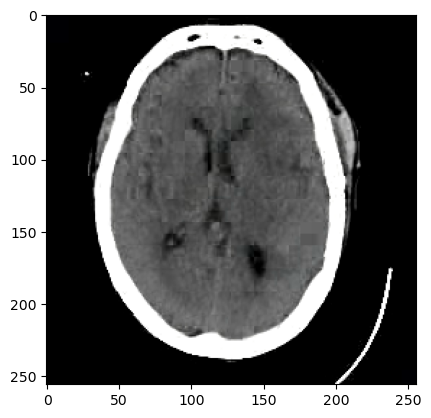

In [4]:
cap = cv2.VideoCapture('./dataset/Neoplastic_Disease/Meningioma/CT/spatial.mpg')
n = 0
while cap.isOpened():
    ret, frame = cap.read()
    n += 1
    if not ret or n == sliceimg:
        break
print(n)
CT = cap.read()[1]
plt.imshow(CT)
image = cv2.cvtColor(CT, cv2.COLOR_BGR2RGB)
print(CT.shape)

11
(256, 256, 3)


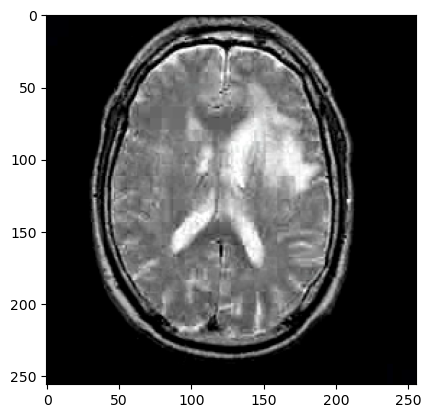

In [5]:
cap = cv2.VideoCapture('./dataset/Neoplastic_Disease/Meningioma/MR-T2/spatial.mpg')
n = 0
while cap.isOpened():
    ret, frame = cap.read()
    n += 1
    if not ret or n == sliceimg:
        break
print(n)
MRI = cap.read()[1]
plt.imshow(MRI)
image = cv2.cvtColor(MRI, cv2.COLOR_BGR2RGB)
print(MRI.shape)

In [6]:
PATH = 'model/SiameseSAM_epoch96.pth'
SiameseSAM = build_siamese_sam(num_classes=num_classes, checkpoint=PATH).to(device)
SiameseSAM.eval()

SiameseSam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()

In [7]:
transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((256, 256))
        ])
inputs = [transform(CT), transform(MRI)]
inputs = [i.to(device) for i in inputs]

In [8]:
output = SiameseSAM(inputs)

In [9]:
output[2].shape

torch.Size([3, 3, 256, 256])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


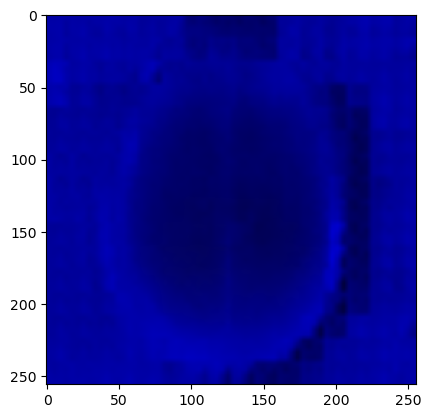

In [10]:
plt.imshow(output[2][2].detach().cpu().permute(1,2,0).numpy())